In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/kylienewcomer/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


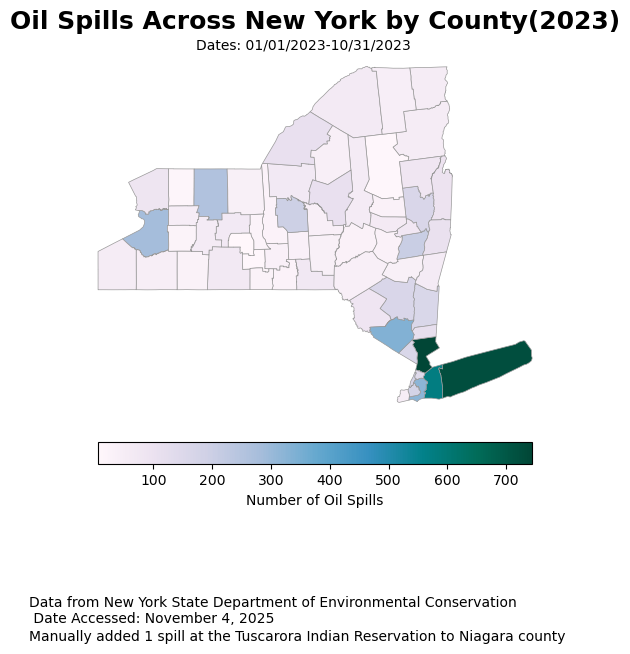

In [2]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load in oil spill data
fp = os.path.join('data/Spill_Incidents_20251107.csv')
spills = gpd.read_file(fp)

# Load in county data
fp = os.path.join('data/tl_2023_us_county/tl_2023_us_county.shp')
counties = gpd.read_file(fp)

# Clean oil spill df columns
spills.columns = spills.columns.str.lower().str.replace(" ", "_")

# Transform `spill_date` to DateTime object
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

# Filter spills data
petr_23 = spills[(spills['spill_date'] >= "01/01/2023") & # Selecting dates from 1/1/23 to 10/31/23
                 (spills['spill_date'] <= "10/31/2023") & 
                 (spills['material_family'] == "Petroleum")] # Select petroleum spills

# Find total spills per county
spills_per_county = petr_23.groupby('county')['spill_number'].count().reset_index()
                                              
# Rename `spill_number` column to `n_spills`
spills_per_county = spills_per_county.rename(columns = {'spill_number': 'n_spills'})

# Clean county df columns
counties.columns = counties.columns.str.lower().str.replace(" ", "_")

# Filter to NY state only
ny_counties = counties[counties['statefp'] == '36']

# Fix name of St Lawrence to match
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Reset indices for both data sets to county names
ny_counties = ny_counties.set_index('name')
spills_per_county = spills_per_county.set_index('county')

# Inner merge df's on indices 
ny_counties = pd.merge(ny_counties, spills_per_county, how = "inner", left_index = True, right_index = True)

# Manually add spill from Tuscarora Indian Reservation to Niagra County
ny_counties.at['Niagara', 'n_spills'] +=1

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create plot
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Oil Spills",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and specify dates
ax.set_title('Oil Spills Across New York by County(2023)', fontsize=18, weight='bold', pad=15)
ax.annotate("Dates: 01/01/2023-10/31/2023", xy = (0.25, 1), xycoords = "axes fraction")

# Add annotations
ax.annotate("Data from New York State Department of Environmental Conservation \n Date Accessed: November 4, 2025", xy = (-0.1, -.55), xycoords = "axes fraction")
ax.annotate("Manually added 1 spill at the Tuscarora Indian Reservation to Niagara county",
             xy = (-0.1, -.6), xycoords = "axes fraction")

plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

The `spills` dataframe comes from the NY gov website. It shows the records of hazardous spills across New York state. This data was accessed and downloaded on 11/07/2025. 

The `county` data comes from the Census Bureau. It contains the legal boundaries and names of all counties in the US as of 2023. This data was accessed and downloaded on 11/07/2025.

## 3. Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Read in data
fp = os.path.join('data/Spill_Incidents_20251107.csv')
spills = gpd.read_file(fp)


fp = os.path.join('data/tl_2023_us_county/tl_2023_us_county.shp')
counties = gpd.read_file(fp)


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. All columns are objects except for the geometry column. The names of the columns are also uppercase and contain spaces.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
spills.columns = (spills.columns
                  .str.lower() # Use `.lower()` to make column names lower case
                  .str.replace(" ", "_")) # Use `.replace()` to replace spaces with underscores

spills.columns # Look at changes

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered', 'geometry'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [10]:
# Change date columns to datetime objects
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])

# Change numeric columns to integers
spills['spill_number'] = pd.to_numeric(spills['spill_number'])
#spills['zip_code'] = pd.to_numeric(spills['zip_code'])
#spills['quantity'] = pd.to_numeric(spills['quantity'])

spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                        object
dec_region                       object
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
geometry                       geometry
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
petr_23 = spills[(spills['spill_date'] >= "01/01/2023") & # Selecting dates from 1/1/23 to 10/31/23
                 (spills['spill_date'] <= "10/31/2023") & 
                 (spills['material_family'] == "Petroleum")] # Select petroleum spills


# Sort values to make sure filter worked
petr_23.sort_values('spill_date')

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
33301,2208528,ALBANESE - AST FILL PORT,134 WEBSTER AVE,,HARRISON,Westchester,,6028,3,2023-01-01,...,Equipment Failure,,Private Dwelling,NaT,#2 fuel oil,Petroleum,0,,0,None
375651,2208230,PRIVATE RESD,500 Cloudview Circle,,Camillus,Onondaga,,3420,7,2023-01-01,...,Deliberate,,Private Dwelling,2023-01-09,gasoline,Petroleum,0,,0,None
140223,2208970,DRIVEWAY,54 HENRY STREET,,INWOOD,Nassau,,3020,1,2023-01-01,...,Other,,Private Dwelling,2023-04-28,transmission fluid,Petroleum,0,Gallons,0,None
109090,2208109,CON ED TRANSMISSION FEEDER PIPE Y50,HANCOCK ST & EAST 5TH ST,,MOUNT VERNON,Westchester,,6018,3,2023-01-01,...,Equipment Failure,,Commercial/Industrial,2023-05-03,dielectric fluid,Petroleum,"1,976",Gallons,0,None
95750,2208144,CITY OF ONEIDA WWTP,387 HARDEN ST,,ONEIDA,Madison,,2712,7,2023-01-01,...,Unknown,ONEIDA CREEK,"Institutional, Educational, Gov., Other",2023-01-04,unknown petroleum,Petroleum,0,,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355763,2306495,PEPSI,2496 WEST RIDGE RD,,ROCHESTER,Monroe,,2828,8,2023-10-31,...,Equipment Failure,,Commercial/Industrial,2023-11-01,diesel,Petroleum,10,Gallons,0,None
210412,2306483,HINK RESIDENCE,280 MAPLE AVE,,NEW HAMPTON,Orange,,3656,3,2023-10-31,...,Equipment Failure,,Private Dwelling,2024-09-17,#2 fuel oil,Petroleum,0,,0,None
355759,2306492,PEPSI,2496 WEST RIDGE RD,"43.210826, -77.694652",GREECE,Monroe,,2828,8,2023-10-31,...,Human Error,,Commercial/Industrial,2023-12-27,diesel,Petroleum,25,Gallons,0,None
406813,2306664,RESIDENTIAL,24 WILLOW AVE,,OTISVILLE,Orange,,3644,3,2023-10-31,...,Equipment Failure,,Private Dwelling,2023-11-07,#2 fuel oil,Petroleum,4.5,Gallons,0,None


In [12]:
petr_23['spill_date'].unique()

<DatetimeArray>
['2023-06-06 00:00:00', '2023-08-28 00:00:00', '2023-09-27 00:00:00',
 '2023-07-28 00:00:00', '2023-01-13 00:00:00', '2023-08-24 00:00:00',
 '2023-02-09 00:00:00', '2023-03-31 00:00:00', '2023-03-15 00:00:00',
 '2023-06-12 00:00:00',
 ...
 '2023-04-02 00:00:00', '2023-08-20 00:00:00', '2023-06-18 00:00:00',
 '2023-02-26 00:00:00', '2023-01-15 00:00:00', '2023-06-04 00:00:00',
 '2023-01-22 00:00:00', '2023-01-21 00:00:00', '2023-03-19 00:00:00',
 '2023-03-12 00:00:00']
Length: 304, dtype: datetime64[ns]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [13]:
unique_dates = petr_23.spill_date.dt.year.unique()
min_date = petr_23.spill_date.min()
max_date = petr_23.spill_date.max()

print(f'The year for all spills in the petr_23 subset is {unique_dates}')
print(f'The first date in the dataframe is {min_date}.')
print(f'The last date in the dataframe is {max_date}.')

The year for all spills in the petr_23 subset is [2023]
The first date in the dataframe is 2023-01-01 00:00:00.
The last date in the dataframe is 2023-10-31 00:00:00.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [14]:
assert petr_23['material_family'].unique() == "Petroleum"
# Check to see if unique values of `material_family` are only Petroleum

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [15]:
# group by county and find count of spills
spills_per_county = petr_23.groupby('county')['spill_number'].count().reset_index()
                                              
# rename `spill_number` sum column to `n_spills`
spills_per_county = spills_per_county.rename(columns = {'spill_number': 'n_spills'})

spills_per_county # view the new df

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [16]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

There are only two numeric columns in the data set: "ALAND' and "AWATER', and the geometry column, The CRS of the data frame is EPSG:4269. There appears to be two columns to designate county names as well.

In [17]:
# a 
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [18]:
# b
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [19]:
# c
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

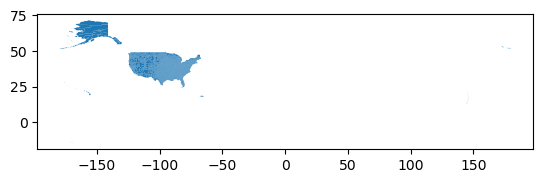

In [20]:
# d
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [21]:
counties.columns = (counties.columns
                            .str.lower() # Use `.lower()` to make column names lower case
                            .str.replace(" ", "_")) # Use `.replace()` to replace spaces with underscores

counties.columns # Check columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [22]:
# Use state code 36 for NY from metadata
ny_counties = counties[counties['statefp'] == '36']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [23]:
ny_counties.name.sort_values().unique() # Look at unique county names, alphabetically sorted

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [24]:
spills_per_county['county'].unique() # Look at unique county names

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [25]:
# Use `np.setdiff1d()` to find difference and create list
diff_names_spills = list(np.setdiff1d(
spills_per_county['county'], # Look for names in spills but not counties
ny_counties['name']))

diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [26]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [27]:
# Use `np.setdiff1d()` to find difference and create list
diff_names_ny = diff_names_spills = list(np.setdiff1d(
    ny_counties['name'], # Look for names in counties but not spills
    spills_per_county['county']))
diff_names_ny

['St. Lawrence']

In [28]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [29]:
# e. 
spills_per_county[spills_per_county['county'] == "Tuscarora Indian Reservation"]
# one spill in Tuscarora Indian Reservation

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [30]:
# Rename St Lawerence to match ny_counties 
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')


spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [31]:
# Check to see if all values have been updated
if 'St Lawrence' in spills_per_county['county'].values:
    print(f"WARNING: Value St Lawrence still exists in column county.")
else:
    print(f"All values updated to `St. Lawrence`!")

All values updated to `St. Lawrence`!


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [32]:
# Change column name for ny_counties['name'] to merge on county name
ny_counties = ny_counties.set_index('name')
spills_per_county = spills_per_county.set_index('county')

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [33]:
# Merge on index
ny_counties = pd.merge(ny_counties, spills_per_county, how = "inner", left_index = True, right_index = True)
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
Steuben,36,101,00974148,36101,0500000US36101,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
Saratoga,36,091,00974143,36091,0500000US36091,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
Allegany,36,003,00974100,36003,0500000US36003,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
Oswego,36,075,00974136,36075,0500000US36075,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
Ulster,36,111,00974153,36111,0500000US36111,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [34]:
# Add one spill to Niagara to account for spill at Tuscarora Indian Reservation
ny_counties.at['Niagara', 'n_spills'] +=1

In [35]:
# Check that addition worked
ny_counties.at["Niagara", 'n_spills']

89

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



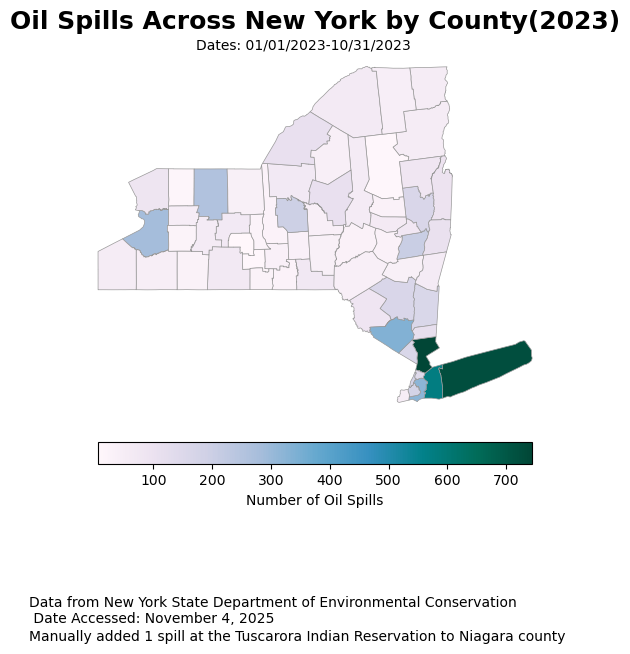

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
ny_counties.plot(
    ax=ax,
    column='n_spills', # Color by number of spills
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={ # Legend aesthetics
        "shrink": 0.7,
        "label": "Number of Oil Spills",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Oil Spills Across New York by County(2023)', fontsize=18, weight='bold', pad=15)
ax.annotate("Dates: 01/01/2023-10/31/2023", xy = (0.25, 1), xycoords = "axes fraction")

ax.annotate("Data from New York State Department of Environmental Conservation \n Date Accessed: November 4, 2025", xy = (-0.1, -.55), xycoords = "axes fraction")
ax.annotate("Manually added 1 spill at the Tuscarora Indian Reservation to Niagara county",
             xy = (-0.1, -.6), xycoords = "axes fraction")

plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

From the figure, it appears that the majority of oil spills occured in the southern point of New York state, specifically around the New York City area. There were far less oil spills in upstate New York.

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [37]:
grader.check_all()

7Ac results:
    7Ac - 1 result:
        ❌ Test case failed
        Trying:
            assert len(diff_names_spills) == 3
        Expecting nothing
        **********************************************************************
        Line 1, in 7Ac 0
        Failed example:
            assert len(diff_names_spills) == 3
        Exception raised:
            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest 7Ac 0[0]>", line 1, in <module>
                assert len(diff_names_spills) == 3
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    7Ac - 2 result:
        ✅ Test case passed

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expecte